In [25]:
import numpy as np

from PIL import Image, ImageDraw, ImageFont

import easyocr
import cv2

In [26]:
img = np.array(Image.open("/home/jjjj/Downloads/Telegram Desktop/c7dc7be6-2fa2-46ff-ba1c-01531ca7f4b6.jpeg"))

In [27]:
img[-10, -10]

array([133,  13,  40], dtype=uint8)

In [28]:
h, w = 544, 408
if img.shape[0] > h or img.shape[1] > w:
    percentage = min(w / img.shape[1], h / img.shape[0])
    new_w = int(percentage * img.shape[1])
    new_h = int(percentage * img.shape[0])
    img = np.array(Image.fromarray(img).resize((new_w, new_h), reducing_gap=3))

In [1]:
from PIL import Image

In [2]:
img = Image.open("/home/jjjj/Downloads/Telegram Desktop/image213_clipdrop-enhance.png")
img.size

(816, 1088)

In [7]:
base_height = 546
wpercent = (base_height / float(img.size[1]))
wsize = int((float(img.size[1]) * float(wpercent)))
new_img = img.resize((408, 546))
new_img.save("123sdkfj.png")

In [ ]:
w_size = 1088 / 540

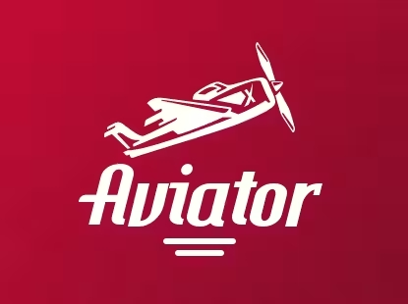

In [29]:
Image.fromarray(img)

In [30]:
a = np.array(Image.fromarray(img).convert("L"))

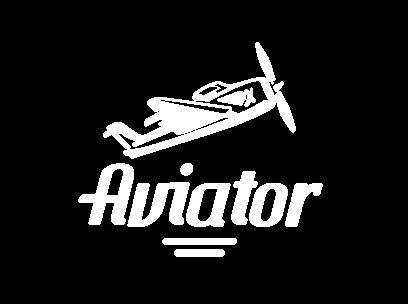

In [31]:
blured = cv2.GaussianBlur(a, (1, 1), cv2.BORDER_DEFAULT)

mask = np.zeros([img.shape[0], img.shape[1]], dtype=np.uint8)
mask[blured > 195] = 255

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv2.drawContours(mask, [c], -1, 255, thickness=2)

Image.fromarray(mask)

In [32]:
new_img = np.array(Image.new("RGB", size=(408, 544), color=(155, 13, 40)))

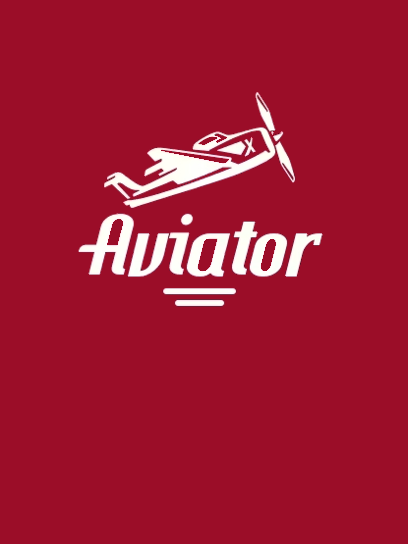

In [33]:
n = 50
new_img[n: n + mask.shape[0], :, :][mask == 255] = img[mask == 255]
Image.fromarray(new_img)

In [36]:
FONT = "/home/jjjj/Documents/gallery_view/fonts/RubikWetPaint-Regular.ttf"

FONT_PATH = "/home/jjjj/Documents/gallery_view/fonts/RedHatText-VariableFont_wght.ttf"

In [52]:
img = Image.fromarray(new_img)
top = 390
draw = ImageDraw.Draw(img)
prov = "Spribe"

font = ImageFont.truetype(FONT, 60)

image = Image.new('RGB', img.size, "white")
draw = ImageDraw.Draw(image)
_, _, w, h = draw.textbbox(
        (0, 0), "AVIATOR", font=font
    )

draw = ImageDraw.Draw(img)

draw.text(((img.size[0] - w) / 2, top), "AVIATOR", font=font, fill="white")
top += h - 10

image = Image.new('RGB', img.size, "white")
draw = ImageDraw.Draw(image)
font = ImageFont.truetype(FONT_PATH, 34)

_, _, w, h = draw.textbbox(
    (0, 0), prov, font=font
)

TOP = 490
draw = ImageDraw.Draw(img)
draw.text(((img.size[0] - w) / 2, TOP), prov, font=font, fill="white")


In [54]:
img.save("aviator.png")

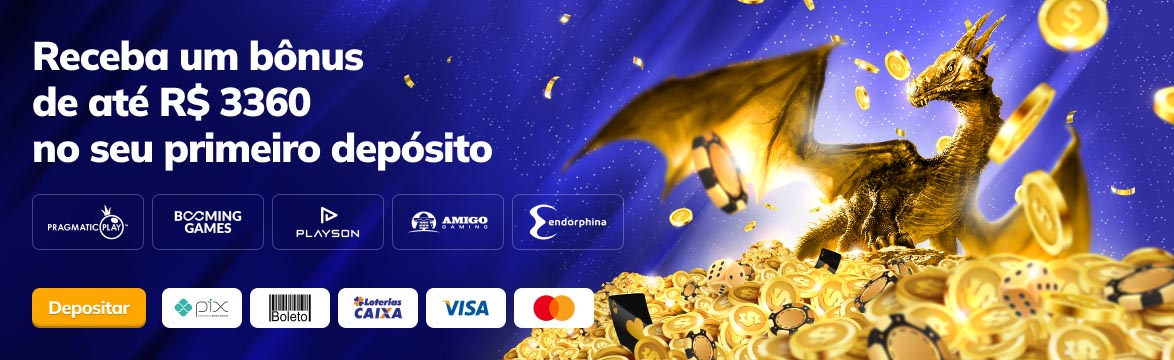

In [2]:
eader = easyocr.Reader(['en'])
img = Image.open("/home/jjjj/Documents/gallery_view/data_test/Desktop_Med/01A_Brazil_x1_Med.jpg")
img

In [3]:
def ocr_predict(img):
    result = eader.readtext(img)

    new_ = []
    
    
    for i in result:
        i = np.array(i[0])
        new_.append([(i[:, 0].min(), i[:, 1].min()), (i[:, 0].max(), i[:, 1].max())])

    if len(new_) == 0:
        return None, None

    return np.array(new_).tolist(), result

In [4]:
bboxes, res = ocr_predict(img)

In [5]:
[i[0] for i in res]

[[[29, 33], [369, 33], [369, 77], [29, 77]],
 [[26, 76], [318, 76], [318, 126], [26, 126]],
 [[29, 133], [157, 133], [157, 169], [29, 169]],
 [[154, 117], [499, 117], [499, 180], [154, 180]],
 [[173, 209], [245, 209], [245, 225], [173, 225]],
 [[441, 215], [491, 215], [491, 227], [441, 227]],
 [[547, 217], [609, 217], [609, 229], [547, 229]],
 [[44, 220], [99, 220], [99, 234], [44, 234]],
 [[183, 221], [235, 221], [235, 237], [183, 237]],
 [[295, 227], [363, 227], [363, 241], [295, 241]],
 [[44, 296], [134, 296], [134, 320], [44, 320]],
 [[192, 296], [232, 296], [232, 320], [192, 320]],
 [[271, 309], [311, 309], [311, 325], [271, 325]],
 [[353, 305], [403, 305], [403, 321], [353, 321]],
 [[442, 296], [492, 296], [492, 320], [442, 320]],
 [[960, 274], [1014, 274], [1014, 334], [960, 334]]]

In [6]:
res

[([[29, 33], [369, 33], [369, 77], [29, 77]],
  'Receba um bonus',
  0.972890171024218),
 ([[26, 76], [318, 76], [318, 126], [26, 126]],
  'de ate RS 3360',
  0.7791543701207948),
 ([[29, 133], [157, 133], [157, 169], [29, 169]],
  'no seu',
  0.8231778315253063),
 ([[154, 117], [499, 117], [499, 180], [154, 180]],
  'primeiro deposito',
  0.9997421808731065),
 ([[173, 209], [245, 209], [245, 225], [173, 225]],
  'BCCMING',
  0.9864921888393919),
 ([[441, 215], [491, 215], [491, 227], [441, 227]],
  'AMIGO',
  0.6779545304131701),
 ([[547, 217], [609, 217], [609, 229], [547, 229]],
  'endorphina',
  0.9993095110276541),
 ([[44, 220], [99, 220], [99, 234], [44, 234]],
  'PRAGMATIC',
  0.7782749568106081),
 ([[183, 221], [235, 221], [235, 237], [183, 237]],
  'GAMES',
  0.9998629870135131),
 ([[295, 227], [363, 227], [363, 241], [295, 241]],
  'PLAYSON',
  0.810877043067601),
 ([[44, 296], [134, 296], [134, 320], [44, 320]],
  'Depositar',
  0.726421229775572),
 ([[192, 296], [232, 296],

In [7]:
bboxes

[[[29, 33], [369, 77]],
 [[26, 76], [318, 126]],
 [[29, 133], [157, 169]],
 [[154, 117], [499, 180]],
 [[173, 209], [245, 225]],
 [[441, 215], [491, 227]],
 [[547, 217], [609, 229]],
 [[44, 220], [99, 234]],
 [[183, 221], [235, 237]],
 [[295, 227], [363, 241]],
 [[44, 296], [134, 320]],
 [[192, 296], [232, 320]],
 [[271, 309], [311, 325]],
 [[353, 305], [403, 321]],
 [[442, 296], [492, 320]],
 [[960, 274], [1014, 334]]]

In [8]:
draw = ImageDraw.Draw(img)

for (x1, y1), (x2, y2) in bboxes:
    draw.rectangle([(x1, y1), (x2, y2)])

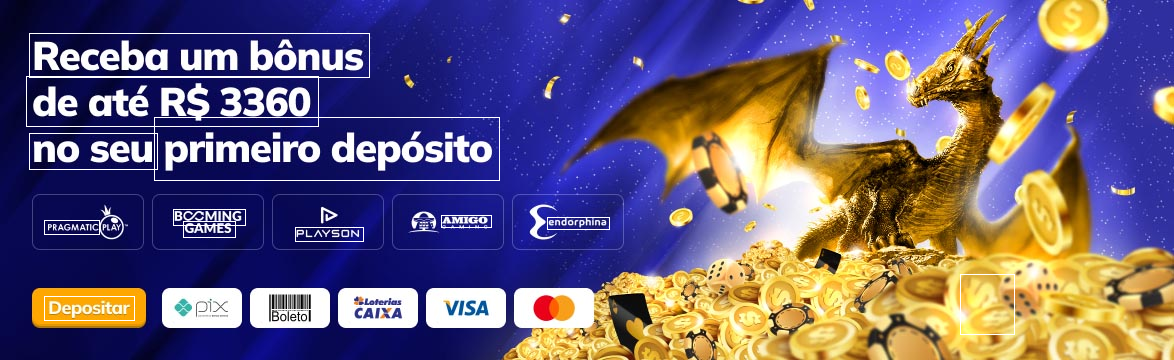

In [9]:
img

In [10]:
cords = [118, 58]

In [11]:
map_bboxes = [False for _ in bboxes]

x, y = cords

for i, ((x1, y1), (x2, y2)) in enumerate(bboxes):
    if x1 < x < x2 and y1 < y < y2:
        map_bboxes[i] = True

In [12]:
map_bboxes

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [13]:
map_bboxes[8] = True
map_bboxes[9] = True
map_bboxes[2] = True

In [14]:
b = []
for bb, i in zip(bboxes, map_bboxes):
    if i:
        b.append(bb)

In [31]:
datas = {}
datas["text"] = []
datas["top"] = []
datas["left"] = []
datas["height"] = []

for r, i in zip(res, map_bboxes):
    if i:
        datas["text"].append(r[1])
        r = np.array(r[0])
        datas["top"].append(r[:, 1].min())
        datas["left"].append(r[:, 0].min())
        datas["height"].append(r[:, 1].max() - r[:, 1].min())
        
    # if i:
    #     b.append(bb)

In [32]:
datas


{'text': ['Receba um bonus', 'no seu', 'GAMES', 'PLAYSON'],
 'top': [33, 133, 221, 227],
 'left': [29, 29, 183, 295],
 'height': [44, 36, 16, 14]}

In [22]:
r

([[29, 33], [369, 33], [369, 77], [29, 77]],
 'Receba um bonus',
 0.972890171024218)

In [29]:
np.array(r[0])[:, 1].min()

33

In [30]:
np.array(r[0])[:, 0].min()

29

In [15]:

bboxes[map_bboxes == True]

[[29, 33], [369, 77]]

In [16]:
np.array(b).shape

(4, 2, 2)

In [23]:
i[:, 0].min()


16

In [24]:
i[:, 1].min()

22